## Exploración y carga de datasets
Exploracion de dataset tabular

## Carga de datasets tabulares de transacciones
En la siguiente celda se cargan los archivos `fraudTrain.csv` y `fraudTest.csv`, se añade una columna `dataset` para identificar el origen y se concatenan. Se imprime el tiempo de carga y se muestra una vista previa (head).

Hacerca del conjunto de datos son simulados de transacciones con tarjetas de crédito que contiene transacciones legítimas y fraudulentas desde el 1 de enero de 2019 hasta el 31 de diciembre de 2020

descargado de "https://www.kaggle.com/datasets/kartik2112/fraud-detection"

In [79]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

# Cargar y combinar ambos CSVs
cols = ["trans_date_trans_time","merchant","category","amt","gender","city","state",
        "zip","lat","long","city_pop","job","dob","trans_num","unix_time","merch_lat",
        "merch_long","is_fraud"]
start = time.time()

df_train = pd.read_csv("fraudTrain.csv", low_memory=False)
df_test = pd.read_csv("fraudTest.csv", low_memory=False)
#agregamos una columna para identificar el origen de los datos
df_train["dataset"] = "train"
df_test["dataset"] = "test"
df = pd.concat([df_train, df_test], ignore_index=True)
end = time.time()
print(f"Tiempo necesario para cargar y combinar archivos CSV: {end - start:.2f} seconds")
print("\n Vista previa de los datos:")
display(df.head())

Tiempo necesario para cargar y combinar archivos CSV: 5.19 seconds

 Vista previa de los datos:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,dataset
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,train
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,train
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,train
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,train
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,train


## Exploración básica del dataset combinado
Esta celda ejecuta `info()`, revisa nulos y duplicados. Observa el número de filas/columnas, tipos y columnas con valores faltantes para decidir la limpieza posterior.

In [80]:
#Resumen de los datos combinados
df.info()
#Verifico nulos
print("¿Hay nulos?", df.isnull().values.any())
print(df.isnull().sum())
#verifico duplicados
dupes = df.duplicated().sum()
print(f"Duplicados encontrados: {dupes}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

## Estadísticas numéricas
Se calculan estadísticas básicas (`count`, `mean`, `std`, `min`, `max`) de las columnas numéricas. Útil para detectar outliers y escalas disímiles.

In [96]:
# Estadísticas numéricas básicas
numeric_stats = df.describe().T[['count', 'mean', 'std', 'min', 'max']]
print(" Estadísticas básicas:\n")
print(numeric_stats)

 Estadísticas básicas:

                count          mean           std           min           max
Unnamed: 0  1852394.0  5.371934e+05  3.669110e+05  0.000000e+00  1.296674e+06
cc_num      1852394.0  4.173860e+17  1.309115e+18  6.041621e+10  4.992346e+18
amt         1852394.0  7.006357e+01  1.592540e+02  1.000000e+00  2.894890e+04
zip         1852394.0  4.881326e+04  2.688185e+04  1.257000e+03  9.992100e+04
lat         1852394.0  3.853931e+01  5.071470e+00  2.002710e+01  6.669330e+01
long        1852394.0 -9.022783e+01  1.374789e+01 -1.656723e+02 -6.795030e+01
city_pop    1852394.0  8.864367e+04  3.014876e+05  2.300000e+01  2.906700e+06
unix_time   1852394.0  1.358674e+09  1.819508e+07  1.325376e+09  1.388534e+09
merch_lat   1852394.0  3.853898e+01  5.105604e+00  1.902742e+01  6.751027e+01
merch_long  1852394.0 -9.022794e+01  1.375969e+01 -1.666716e+02 -6.695090e+01
is_fraud    1852394.0  5.210015e-03  7.199217e-02  0.000000e+00  1.000000e+00


## Conteos de variables categóricas
Aquí se listan variables detectadas como objeto y se muestran los top valores de columnas relevantes (`category`, `gender`, `state`, `job`). Sirve para revisar cardinalidad y categorías dominantes.

In [82]:
# Conteos para variables categóricas
cat_cols = df.select_dtypes(include='object').columns
print("\n Variables categóricas detectadas:")
print(list(cat_cols))

for c in ['category', 'gender', 'state', 'job']:
    if c in df.columns:
        print(f"\n--- {c.upper()} ---")
        print(df[c].value_counts().head(10))


 Variables categóricas detectadas:
['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num', 'dataset']

--- CATEGORY ---
category
gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
Name: count, dtype: int64

--- GENDER ---
gender
F    1014749
M     837645
Name: count, dtype: int64

--- STATE ---
state
TX    135269
NY    119419
PA    114173
CA     80495
OH     66627
MI     65825
IL     62212
FL     60775
AL     58521
MO     54904
Name: count, dtype: int64

--- JOB ---
job
Film/video editor             13898
Exhibition designer           13167
Surveyor, land/geomatics      12436
Naval architect               12434
Materials engineer            11711
Designer, ceramics/pottery    11688
Environmental consultant      1097

## Visualizaciones rápidas
Se grafican las top categorías y la distribución por genero. Observa forma de la distribución (asimetría, colas) y categorías más frecuentes.

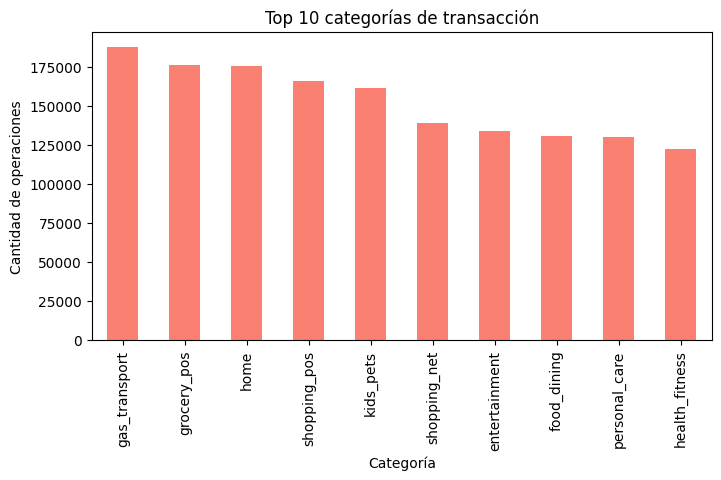

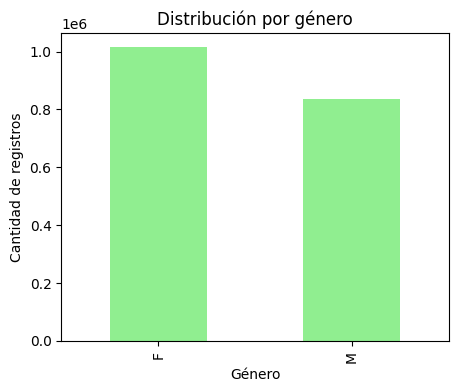

In [83]:
# Visualizaciones rápidas
if 'category' in df.columns:
    plt.figure(figsize=(8,4))
    df['category'].value_counts().head(10).plot(kind='bar', color='salmon')
    plt.title("Top 10 categorías de transacción")
    plt.xlabel("Categoría")
    plt.ylabel("Cantidad de operaciones")
    plt.show()
if 'gender' in df.columns:
    plt.figure(figsize=(5,4))
    df['gender'].value_counts().plot(kind='bar', color='lightgreen')
    plt.title("Distribución por género")
    plt.xlabel("Género")
    plt.ylabel("Cantidad de registros")
    plt.show()

## Estadísticas agrupadas
Se calculan promedios por `gender` y por `state` (top 10). Útil para detectar diferencias sistemáticas entre grupos.

In [95]:
# Promedio de monto por género
if {'gender', 'amt'}.issubset(df.columns):
    print("\n Monto promedio por género:")
    print(df.groupby('gender')['amt'].agg(['mean','std','count']).round(2))

# Promedio de monto por estado (Top 10)
if {'state', 'amt'}.issubset(df.columns):
    print("\n Monto promedio por estado (Top 10):")
    print(df.groupby('state')['amt'].mean().sort_values(ascending=False).head(10).round(2))


 Monto promedio por género:
         mean     std    count
gender                        
F       69.96  156.15  1014749
M       70.19  162.93   837645

 Monto promedio por estado (Top 10):
state
DE    514.49
VT     80.57
CO     77.77
NC     77.20
NH     75.87
WY     75.58
AR     75.55
AZ     75.27
DC     75.22
ID     75.03
Name: amt, dtype: float64


##  datasets no estructurados

En esta sección procesamos texto bruto (`wikisent2.txt`) paso a paso. A continuación hay una breve explicación antes de cada bloque de código para facilitar la lectura y mantenimiento del notebook.

Hacerca del conjunto de datos es un volcado de Wikipedia es un archivo XML gigante que contiene muchísimo contenido poco útil.

descargado de "https://www.kaggle.com/datasets/mikeortman/wikipedia-sentences?select=enwiki-20221001-sentences.txt"

**Definiciones y expresiones regulares**
Este bloque define los patrones (regex) que usamos para: detectar tokens (palabras, incluyendo acentos y guiones), URLs, emails, números y para dividir oraciones.
Modificar estas expresiones afecta directamente cómo se tokeniza y segmenta el texto.

In [85]:
import re, unicodedata
from collections import Counter
TOKEN_RE = re.compile(r"[A-Za-zÀ-ÖØ-öø-ÿ]+(?:[-'][A-Za-zÀ-ÖØ-öø-ÿ]+)*") #Tokeniza palabras con acentos y guiones
URL_RE   = re.compile(r"https?://\S+|www\.\S+")  #Detecta URLs
EMAIL_RE = re.compile(r"\b[\w\.-]+@[\w\.-]+\.\w+\b") #Detecta emails
NUM_RE   = re.compile(r"\b\d+(?:[\.,]\d+)?\b") #Detecta números 
PUNCT_SP = re.compile(r"\s+") #Detecta espacios en blanco
SENT_SPLIT_RE = re.compile(r"(?<=[.!?])\s+") #Detecta el final de oraciones usando como referencia ., ! o ?, limitacion no distingue abreviaciones
STOP = {
    "the","of","in","and","a","to","is","on","for","by","with","as","at","from", # Artículos y preposiciones comunes en inglés para filtrar el ruido textual
    "that","this","it","an","be","are","or","was","which","has","have","had","not",
    "but","were","into","their","its","if","they","there","we","you","i"
}

**Funciones auxiliares**
Aquí se definen `normalize_text` y `tokenize`.
- `normalize_text`: aplica normalización Unicode, convierte a minúsculas, reemplaza URLs/emails y números, y compacta espacios.
- `tokenize`: extrae tokens usando `TOKEN_RE`. Mantener estas funciones independientes facilita pruebas y ajustes.

In [86]:
def normalize_text(s: str) -> str: #Normaliza a minúsculas y convierte todos los caracteres a su forma canónica
    s = unicodedata.normalize("NFKC", s).lower()
    s = URL_RE.sub(" ", s) #Reemplaza URLs con espacio  
    s = EMAIL_RE.sub(" ", s) #Reemplaza emails con espacio
    s = NUM_RE.sub(" <num> ", s) #Reemplaza números con <num>
    s = PUNCT_SP.sub(" ", s).strip() #quita los espacios repetidos dejando solo uno y tambien borra los espacios al inicio y final
    return s
def tokenize(s: str):
    return TOKEN_RE.findall(s) #Devuelve una lista de palabras (tokens)

## Inicialización de contadores y estructuras
Se crean `Counter`, contadores y una `set` para `line_hashes`.
Estos acumuladores permiten computar métricas en una sola pasada (streaming) sin necesitar cargar todo el archivo en memoria.

In [87]:
total_chars = 0 #Contador de caracteres
total_lines = 0 #Contador de líneas
total_sentences = 0 #Contador de oraciones
token_counts = Counter() #Contador de tokens
stop_count = 0 #Contador de stopwords
len_token_sum = 0 #Suma de la longitud de los tokens
sent_len_sum = 0 #Suma de la longitud de las oraciones
sent_len_dist = Counter() #Distribución de la longitud de las oraciones
line_hashes = set() #Para detectar líneas duplicadas sirve en este caso

## Bucle de lectura y limpieza
Se abre `wikisent2.txt` y se itera línea por línea. Para cada línea: se evita duplicados por hash, se normaliza, se divide en oraciones y se tokeniza cada oración; después se actualizan los contadores.
Este patrón es eficiente para archivos grandes y permite procesar sin cargar todo en memoria.

In [88]:

with open("wikisent2.txt", encoding="utf8") as f:
    for line in f:
        total_lines += 1
        total_chars += len(line)
        h = hash(line)
        if h in line_hashes:
            continue
        line_hashes.add(h)
        line = normalize_text(line)
        if not line:
            continue
        sentences = SENT_SPLIT_RE.split(line)
        for s in sentences:
            if not s: 
                continue
            toks = tokenize(s)
            if not toks:
                continue
            total_sentences += 1
            sent_len = len(toks)
            sent_len_sum += sent_len
            sent_len_dist[sent_len] += 1          
            for t in toks:
                token_counts[t] += 1
                len_token_sum += len(t)
                if t in STOP:
                    stop_count += 1


## Vista previa de los datos
Mientras se procesa el archivo se almacenan ejemplos reducidos en una `deque` para inspección rápida. Al final se construye un `DataFrame` con esas filas y se muestra `.head()` para revisar datos limpios sin cargar el dataset entero.

In [89]:
from collections import deque

PREVIEW_N = 12
preview_rows = deque(maxlen=PREVIEW_N)  # nunca supera N filas

# dentro del loop, justo donde hoy haces append:
preview_rows.append({
    "sentence": s[:200],                 # recorta texto
    "n_tokens": len(toks),               # guarda números, no listas
    "tokens_preview": " ".join(toks[:12])  # string corto, no lista completa
})

# al final:
import pandas as pd
df_clean = pd.DataFrame(preview_rows, dtype="string")  # columnas string eficientes
display(df_clean.head())


,sentence,n_tokens,tokens_preview
0,z (z [zetto]) is the fifth album released by t...,14,z z zetto is the fifth album released by the j...


## Cálculo de métricas finales
Aquí se resumen números clave: total de tokens, vocabulario, TTR, longitudes medias, proporción de stopwords y ratio de líneas duplicadas. 

In [90]:
# Resumen de estadísticas
# total de tokens procesados y numero de palabras únicas 
total_tokens = sum(token_counts.values())
vocab_size = len(token_counts)
# mide la riqueza del vocabulario 
type_token_ratio = vocab_size / total_tokens if total_tokens else 0
# Longitud media de token y tokens por oración.
avg_token_len = len_token_sum/total_tokens if total_tokens else 0
avg_sent_len  = sent_len_sum/total_sentences if total_sentences else 0
# proporción de stopwords
stopword_ratio = stop_count/total_tokens if total_tokens else 0
# estima el porcentaje de líneas duplicadas
dup_lines_ratio = 1 - (len(line_hashes)/total_lines) if total_lines else 0
# muestra las 20 palabras más comunes
top20 = token_counts.most_common(20)



## Impresión de métricas
Este bloque muestra por pantalla las métricas calculadas en el bloque anterior con formato legible para revisión rápida.

In [91]:
#mostras metricas finales
print("=== MÉTRICAS LIMPIEZA TEXTO (streaming) ===")
print(f"Carácteres leídos:       {total_chars:,}")
print(f"Líneas totales:          {total_lines:,}")
print(f"Oraciones (aprox):       {total_sentences:,}")
print(f"Tokens totales:          {total_tokens:,}")
print(f"Vocabulario (únicos):    {vocab_size:,}")
print(f"TTR (únicos/tokens):     {type_token_ratio:.4f}")
print(f"Longitud prom. token:    {avg_token_len:.2f}")
print(f"Tokens/Oración (prom):   {avg_sent_len:.2f}")
print(f"% Stopwords:             {stopword_ratio*100:.1f}%")
print(f"% líneas duplicadas:     {dup_lines_ratio*100:.2f}%")
print("\nTop 5 tokens:", top20[:5], "...")


=== MÉTRICAS LIMPIEZA TEXTO (streaming) ===
Carácteres leídos:       934,571,982
Líneas totales:          7,871,825
Oraciones (aprox):       8,362,130
Tokens totales:          152,092,526
Vocabulario (únicos):    1,654,483
TTR (únicos/tokens):     0.0109
Longitud prom. token:    4.99
Tokens/Oración (prom):   18.19
% Stopwords:             34.1%
% líneas duplicadas:     0.00%

Top 5 tokens: [('the', 10842528), ('num', 5523862), ('of', 5342759), ('in', 4967051), ('and', 4531416)] ...


## breve visualizacion
Este bloque genera: gráfico de las 20 palabras más frecuentes, histograma de longitudes de oración y proporción de stopwords. Útil para visualizar la forma del corpus y detectar sesgos o distribuciones inesperadas.

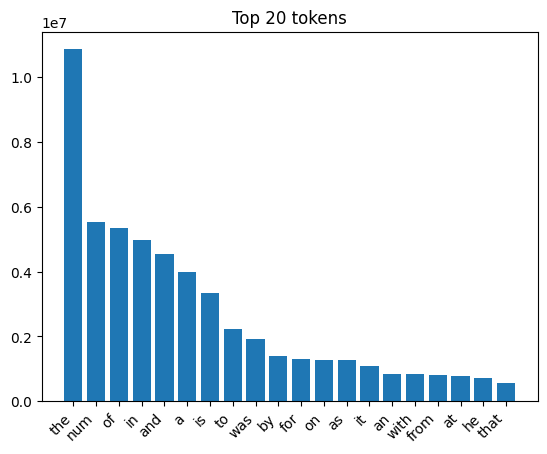

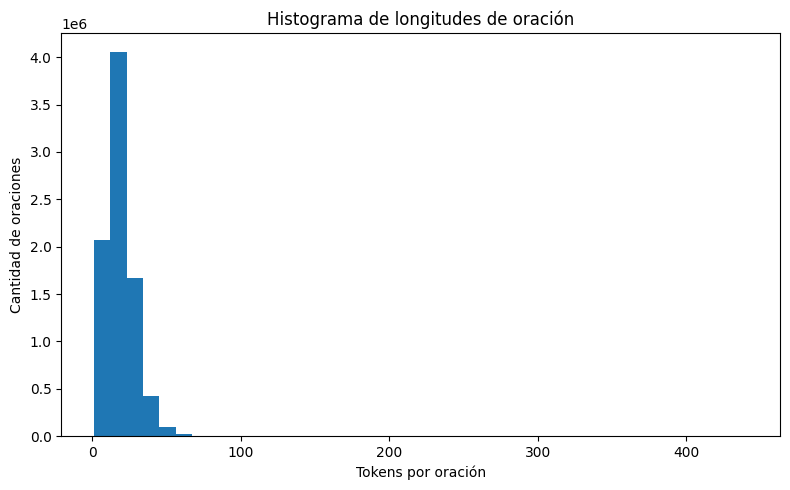

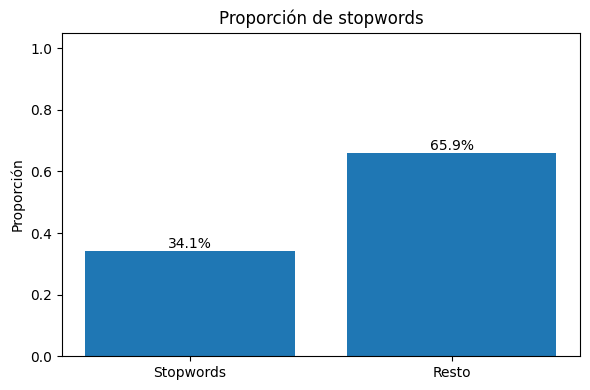

In [92]:
# Top 20 tokens
w,f = zip(*token_counts.most_common(20))
plt.bar(w,f); plt.xticks(rotation=45, ha='right'); plt.title("Top 20 tokens"); plt.show()
# reconstruye una lista de longitudes ponderada por frecuencia
sent_lengths = []
for length, count in sent_len_dist.items():
    sent_lengths.extend([length] * count)

plt.figure(figsize=(8,5))
plt.hist(sent_lengths, bins=40)
plt.xlabel("Tokens por oración")
plt.ylabel("Cantidad de oraciones")
plt.title("Histograma de longitudes de oración")
plt.tight_layout()
plt.show()
stop_ratio = (stop_count / total_tokens) if total_tokens else 0
rest = 1 - stop_ratio

plt.figure(figsize=(6,4))
plt.bar(["Stopwords", "Resto"], [stop_ratio, rest])
plt.ylabel("Proporción")
plt.title("Proporción de stopwords")
for i, v in enumerate([stop_ratio, rest]):
    plt.text(i, v, f"{v*100:.1f}%", ha="center", va="bottom")
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()


# Diferencias entre datos estructurados y no estructurados

### Complejidad de análisis
- Los datos tabulares (estructurados) son aquellos que se organizan en filas y columnas, como hojas de cálculo o bases SQL. Cada columna representa una variable y cada fila un registro.
Estos datos son fáciles de analizar con herramientas como Pandas o NumPy, ya que su estructura regular permite realizar operaciones estadísticas, filtrados o agregaciones directamente.
- En cambio, los datos no tabulares (no estructurados) no siguen una forma fija. Pueden ser texto libre, archivos JSON jerárquicos, imágenes, audio, o incluso videos.
Su análisis requiere preprocesamiento adicional para convertirlos a una forma numérica o estructurada antes de aplicar modelos o estadísticas.
### Complejidad de preprocesamiento
Tabular:
- Eliminación de duplicados y valores nulos.
- Conversión de tipos de datos (object → float).
- Normalización o estandarización numérica.
- Creación de variables derivadas (monto_log = log(amt)).
- Codificación de variables categóricas (one-hot encoding, label encoding).
No tabular (texto):
- Eliminación de signos de puntuación y mayúsculas.
- Eliminación de stopwords.
- Lematización o stemming.
- Tokenización.
- Vectorización (TF-IDF, Word2Vec, embeddings).

### Utilidad en Ciencia de Datos
- Los datos tabulares son ideales para modelos estadísticos y de machine learning clásico (regresión, árboles, clustering).
- Los datos no tabulares son más útiles en deep learning (aprendizaje profundo), donde se aplican redes neuronales convolucionales (CNN) para imágenes o modelos de lenguaje (Transformers, LSTM) para texto.

# Ejemplos concretos de transformaciones

### Transformaciones de datos tabulares

Explicación del siguiente bloque de código (tabular → texto vectorizado):

- Se crea un DataFrame de ejemplo con una columna `description` que simula mensajes/textos reales.
- `clean_text`: limpieza básica → pasar a minúsculas y eliminar caracteres que no sean letras/números/espacios .
- `CountVectorizer(stop_words='english')`: tokeniza y construye una matriz "bag-of-words" (conteo de tokens) ignorando palabras vacías en inglés.
- `X` es la matriz dispersa resultante; la última línea construye un DataFrame denso para visualizar la matriz de conteos con columnas = vocabulario.

Qué observar al ejecutar:
- Columnas resultantes: tokens encontrados tras limpieza y tokenización.
- Filas: una por texto de ejemplo; valores numéricos: conteos de cada token.

In [93]:
# Creamos ejemplos de texto que podrían venir en tu dataset real
text_data = pd.DataFrame({
    "description": [
        "Customer reports unauthorized charge on card",
        "Transaction declined, possible system error",
        "Refund processed successfully"
    ]
})

# Limpieza y vectorización básica
text_data['clean_text'] = text_data['description'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_data['clean_text'])

# Mostrar matriz resultante
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


,card,charge,customer,declined,error,possible,processed,refund,reports,successfully,transaction,unauthorized
0,1,1,1,0,0,0,0,0,1,0,0,1
1,0,0,0,1,1,1,0,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0,1,0,0


### Transformaciones de datos no tabulares

Explicación del siguiente bloque de código (texto no estructurado → vectorización):

- Se reutiliza un pequeño conjunto de ejemplos textuales para mostrar el pipeline mínimo de preprocesamiento y vectorización.
- Pasos clave idénticos al ejemplo anterior: limpieza (lower + remoción de puntuación), vectorización con CountVectorizer y creación de una representación matricial.
- Propósito: ilustrar cómo convertir texto no estructurado en una forma numérica (matriz de conteos) que puede ser usada por modelos de ML clásicos.

Qué observar al ejecutar:
- Repite el proceso para otros textos reales; revisar tamaño del vocabulario y filas con tokens más frecuentes.

In [94]:
text_data = pd.DataFrame({
    "description": [
        "Customer reports unauthorized charge on card",
        "Transaction declined, possible system error",
        "Refund processed successfully"
    ]
})

# Limpieza y vectorización básica
text_data['clean_text'] = text_data['description'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_data['clean_text'])

# Mostrar matriz resultante
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


,card,charge,customer,declined,error,possible,processed,refund,reports,successfully,transaction,unauthorized
0,1,1,1,0,0,0,0,0,1,0,0,1
1,0,0,0,1,1,1,0,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0,1,0,0


# Conclusión final — Comparación entre datos estructurados y no estructurados

El análisis realizado evidencia que los datasets tabulares y no tabulares representan dos enfoques complementarios dentro de la Ciencia de Datos, cada uno con ventajas y desafíos propios.
Los datos tabulares, como los del conjunto de fraude (fraudTrain y fraudTest), ofrecen una estructura clara y uniforme que facilita el preprocesamiento, la aplicación de estadísticas descriptivas, visualizaciones simples y la implementación directa de modelos de machine learning clásico.
Su manipulación con librerías como Pandas es rápida, intuitiva y eficiente, permitiendo obtener información clave a través de operaciones como agrupaciones, normalización o codificación de variables categóricas.

Por otro lado, los datos no tabulares, como texto libre o estructuras JSON, requieren mayor complejidad en el análisis y preprocesamiento.
Antes de poder aplicar cualquier modelo, deben transformarse en una representación numérica —por ejemplo, mediante vectorización (Bag of Words, TF-IDF) o aplanamiento de jerarquías JSON—.
Aunque esto incrementa el trabajo previo, estos datos ofrecen una riqueza semántica y contextual mucho mayor, esencial para tareas de NLP, detección de anomalías o análisis de sentimiento.

En conclusión, mientras los datos tabulares destacan por su simplicidad y precisión estructurada, los no tabulares amplían el alcance analítico hacia fuentes de información más complejas y expresivas.
La integración de ambos tipos de datos constituye una práctica fundamental en proyectos modernos de Ciencia de Datos, permitiendo construir modelos más completos, robustos y cercanos a la realidad de los fenómenos que se estudian.